In [1]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
api = wandb.Api()

In [100]:
run = api.run("cthoens/Workbook/19khw1ka")
DISCOUNTED_REWARD  = "Sample Trajectories.Disc Reward"
SUCCESS_RATE  = "Sample Trajectories.Success Rate"
disc_reward = np.array([row[DISCOUNTED_REWARD] for row in run.scan_history(keys=[DISCOUNTED_REWARD])])
success_rate = np.array([row[SUCCESS_RATE] for row in run.scan_history(keys=[SUCCESS_RATE])])

In [112]:
epoch_lesson = np.zeros(len(disc_reward))

lesson = 0
lesson_start_epoch = 0
next_distance = 150
maxima_x = []
maxima_y = []
maxima_dist = []
for epoch, epoch_disc_reward in enumerate(disc_reward):
    lesson_warmup_phase = epoch - lesson_start_epoch <= 10
    if lesson_warmup_phase:
        max_disc_reward_epoch = epoch + 1
        max_disc_reward = float('-inf')
    elif epoch_disc_reward > max_disc_reward:        
        maxima_dist.append(epoch - max_disc_reward_epoch)
        
        #next_distance *= 1.054532
        max_disc_reward = epoch_disc_reward
        max_disc_reward_epoch = epoch        
        
        maxima_x.append(epoch)
        maxima_y.append(max_disc_reward)

    if epoch - max_disc_reward_epoch > next_distance:
        lesson += 1
        lesson_start_epoch = epoch + 1
        max_disc_reward = float('-inf')
        max_disc_reward_epoch = epoch + 1
        
    epoch_lesson[epoch] = lesson
        
        #self.own_stats[self.LESSON] = self.lesson
        #self.save_checkpoint(f"lesson {self.lesson}.pt")

        #has_more_lessons = self.env_manager.set_lesson(self.lesson)
        #if has_more_lessons:
        #    print(f"Starting lesson {self.lesson}")
        #else:
        #    print(f"Training completed")
        #    return

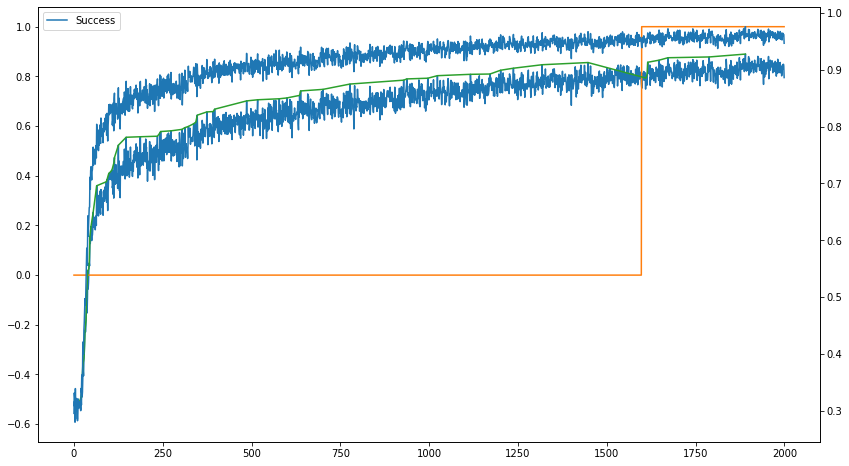

In [113]:
plt.rcParams["figure.figsize"] = [14, 8]
fig,ax = plt.subplots()
ax.plot(disc_reward, label="Disc. Rew")
ax.plot(epoch_lesson, label="Lesson")
ax.plot(maxima_x, maxima_y, label="Maxima")
ax2=ax.twinx()
ax2.plot(success_rate, label="Success")
#plt.xlim([0, 2000])
#plt.ylim([-0.6, 1])
plt.legend()

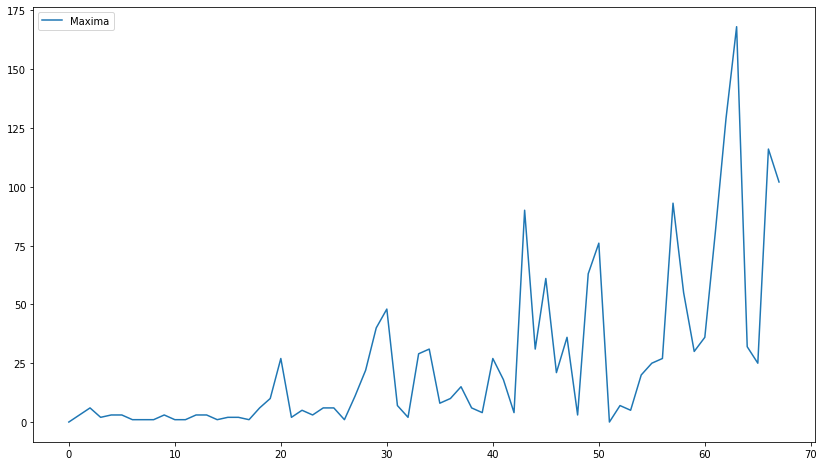

In [94]:
plt.rcParams["figure.figsize"] = [14, 8]
plt.plot(maxima_dist, label="Maxima")
plt.legend()

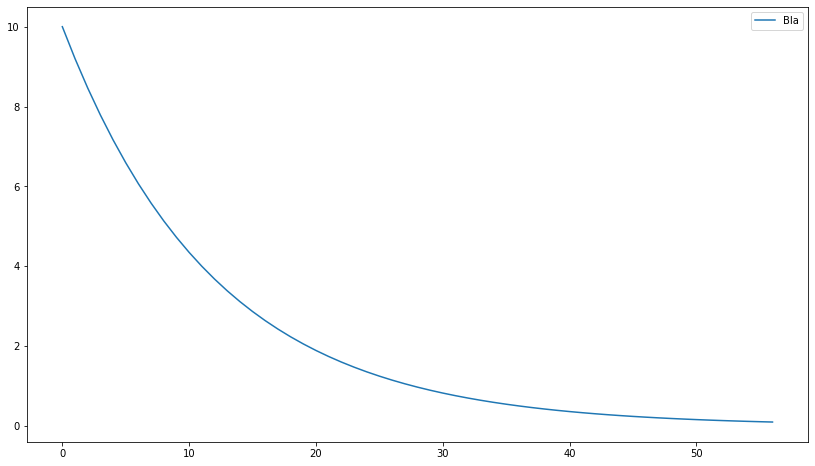

In [16]:
bla = []

factor = 10
decay = 0.92
for i in range(10000):    
    bla.append(factor)
    if factor < 0.1:
        break
    factor *= decay
    
plt.rcParams["figure.figsize"] = [14, 8]
plt.plot(bla, label="Bla")
plt.legend()